In [1]:
import math
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Stock Price Prediction

In [2]:
df = pd.read_excel('FORD_monthly.xlsx')
df = df[['date','AvgRate','AvgCompound','sales','PercPos','Close','Mkt-RF','SMB','HML']]
df = df.dropna(how='any')
df = df.set_index('date')

#Normilize 
scaler = MinMaxScaler(feature_range=(0,1))
df[['AvgRate','Close','sales']] = scaler.fit_transform(df[['AvgRate','Close','sales']])

#Shift Data Frame
projection = 4
df['prediction'] = df[['Close']].shift(-projection)
df_1 = df[:-4]
X = df_1.drop(columns=['prediction'],axis=1)
y = df_1['prediction']

#Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

x_test2 = df.drop(columns=['prediction'])
y_test2 = df['prediction']

In [3]:
print(abs(df[125:].corr().Close).sort_values(ascending=False))

Close          1.000000
prediction     0.747075
HML            0.242061
AvgRate        0.204663
PercPos        0.151467
SMB            0.107619
sales          0.071226
Mkt-RF         0.015036
AvgCompound    0.003701
Name: Close, dtype: float64


In [4]:
#Neural Networks Regression Stock Price

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(1000, input_dim=8,activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs= 500)

Epoch 1/500
5/5 [==============================] - 5s 324ms/step - loss: 0.1774 - mae: 0.3519 - val_loss: 0.1067 - val_mae: 0.2863
Epoch 2/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0504 - mae: 0.1816 - val_loss: 0.0610 - val_mae: 0.1968
Epoch 3/500
5/5 [==============================] - 0s 42ms/step - loss: 0.0447 - mae: 0.1738 - val_loss: 0.0364 - val_mae: 0.1580
Epoch 4/500
5/5 [==============================] - 0s 46ms/step - loss: 0.0253 - mae: 0.1308 - val_loss: 0.0196 - val_mae: 0.1043
Epoch 5/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0176 - mae: 0.1031 - val_loss: 0.0166 - val_mae: 0.1010
Epoch 6/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0167 - mae: 0.1037 - val_loss: 0.0130 - val_mae: 0.0894
Epoch 7/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0170 - mae: 0.1032 - val_loss: 0.0130 - val_mae: 0.0895
Epoch 8/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0159 - mae: 0.0

1/1 [==============================] - 0s 19ms/step - loss: 0.0168 - mae: 0.1044
Mean squared error : 0.01681366376578808
Mean absolute error: 0.10435350984334946


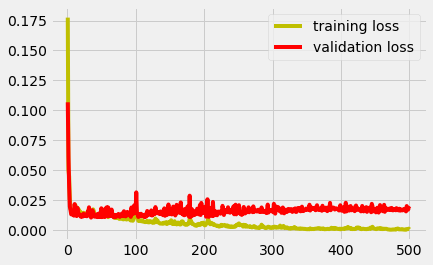

In [5]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r',label='validation loss')
plt.legend()

mse_neural, mae_neural = model.evaluate(x_test,y_test)

print('Mean squared error :',mse_neural)
print('Mean absolute error:',mae_neural)

y_pred_neu = model.predict(x_test)
r2_neu = r2_score(y_test,y_pred_neu)

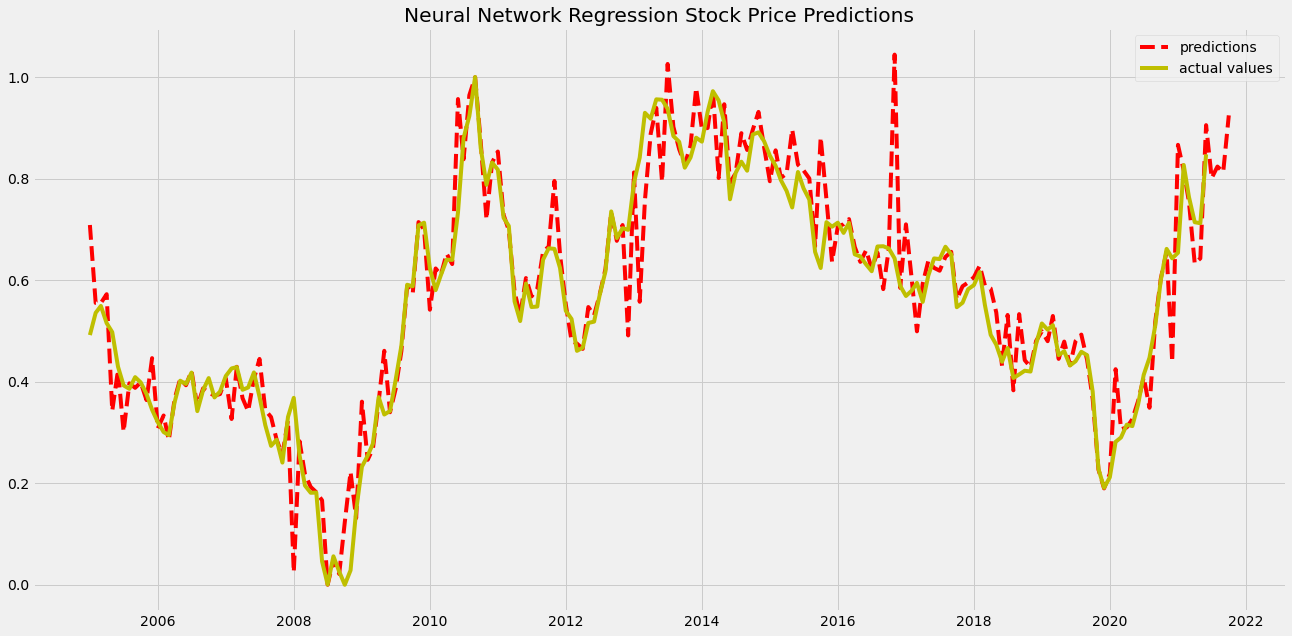

In [6]:
#Neural networks stock price predicitons
y_pred_neu2 = model.predict(x_test2)
neu_pred_data = pd.DataFrame(y_pred_neu2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Neural Network Regression Stock Price Predictions')
plt.plot(neu_pred_data[0],'r--',label='predictions')
plt.plot(neu_pred_data['prediction'],'y',label='actual values')
plt.legend()

Mean squared error from linear reg: 0.008794095024387822
Mean absolute error 0.07510241718028852


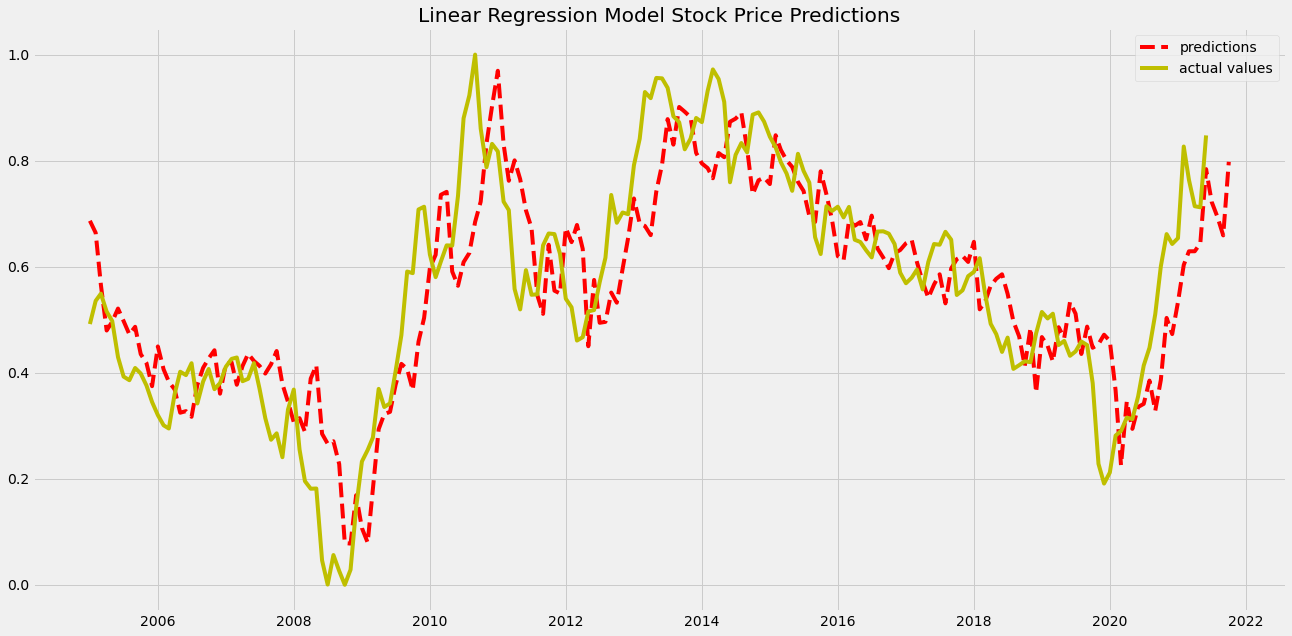

In [7]:
#Linear Model Regression
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print('Mean squared error from linear reg:',mse_lr)
print('Mean absolute error',mae_lr)

y_pred_lr2 = lr_model.predict(x_test2)
lr_pred_data = pd.DataFrame(y_pred_lr2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Linear Regression Model Stock Price Predictions')
plt.plot(lr_pred_data[0],'r--',label='predictions')
plt.plot(lr_pred_data['prediction'],'y',label='actual values')
plt.legend()


Mean squared error from dt: 0.025183726204021324
Mean absolute error dt: 0.12069729651966536
Close          0.733621
sales          0.063340
Mkt-RF         0.054054
HML            0.040735
AvgRate        0.038700
SMB            0.024406
PercPos        0.023756
AvgCompound    0.021388
dtype: float64


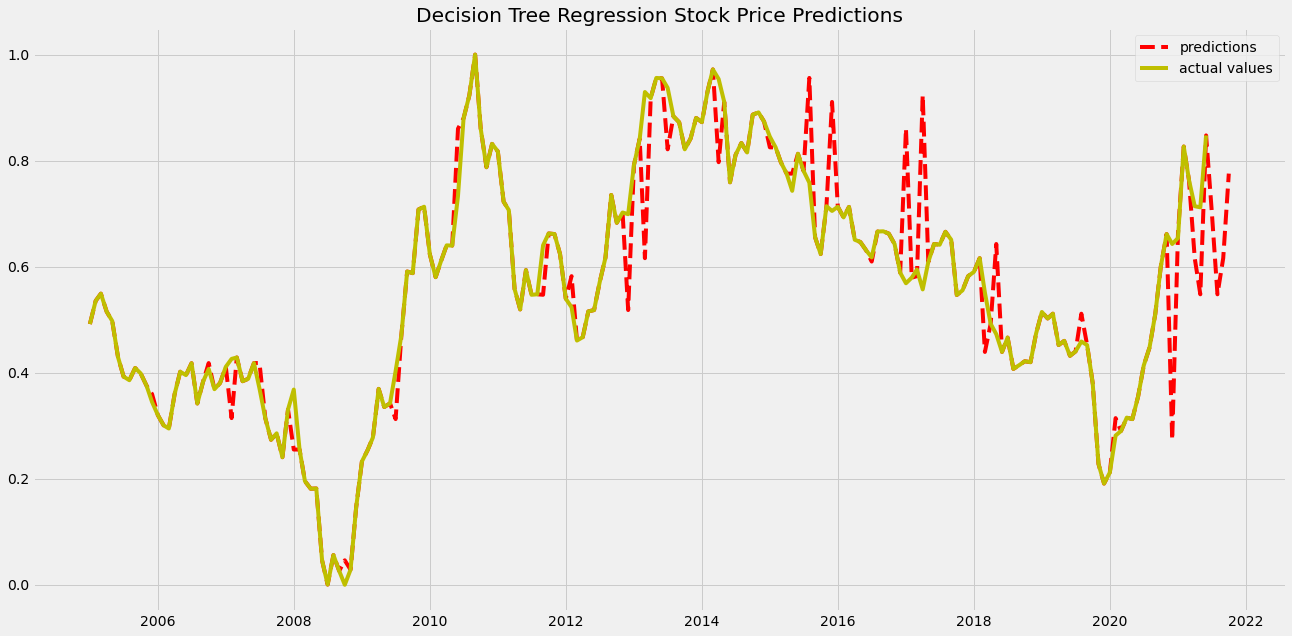

In [8]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt = mean_absolute_error(y_test,y_pred_tree)
r2_dt = r2_score(y_test,y_pred_tree)

print('Mean squared error from dt:',mse_dt)
print('Mean absolute error dt:',mae_dt)

y_pred_dt2 = tree.predict(x_test2)
dt_pred_data = pd.DataFrame(y_pred_dt2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Decision Tree Regression Stock Price Predictions')
plt.plot(dt_pred_data[0],'r--',label='predictions')
plt.plot(dt_pred_data['prediction'],'y',label='actual values')
plt.legend()

#Feature Ranking
print(pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False))


Mean squared error from dt: 0.01681366321338684
Mean absolute error dt: 0.10435350099950093
Close          0.748914
sales          0.070745
Mkt-RF         0.042349
SMB            0.034735
PercPos        0.029919
HML            0.029848
AvgRate        0.028985
AvgCompound    0.014504
dtype: float64


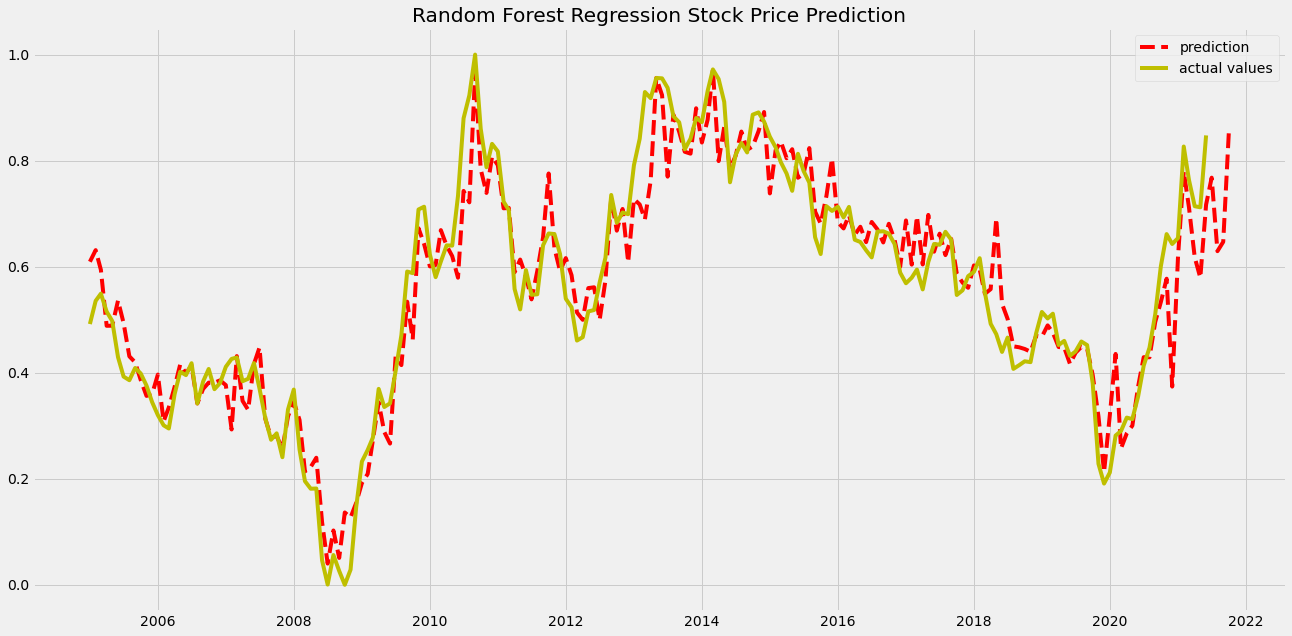

In [9]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=10, random_state=30)
rfmodel.fit(x_train,y_train)

y_pred_rf = model.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print('Mean squared error from dt:',mse_rf)
print('Mean absolute error dt:',mae_rf)

y_pred_rf2 = rfmodel.predict(x_test2)
rf_pred_data = pd.DataFrame(y_pred_rf2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Random Forest Regression Stock Price Prediction')
plt.plot(rf_pred_data[0],'r--',label='prediction')
plt.plot(rf_pred_data['prediction'],'y',label='actual values')
plt.legend()

print(pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False))

In [10]:
print('Neural Networks mse,mae,r2:',mse_neural,mae_neural,r2_neu)
print('Linear Regression mse,mae,r2:',mse_lr,mae_lr,r2_lr)
print('Decison tree mse,mae,r2',mse_dt,mae_dt,r2_dt)
print('Random forests mse,mae,r2',mse_rf,mae_rf,r2_rf)

Neural Networks mse,mae,r2: 0.01681366376578808 0.10435350984334946 0.613688766587908
Linear Regression mse,mae,r2: 0.008794095024387822 0.07510241718028852 0.7979466073217439
Decison tree mse,mae,r2 0.025183726204021324 0.12069729651966536 0.42137794671407613
Random forests mse,mae,r2 0.01681366321338684 0.10435350099950093 0.613688766587908


# Sales Predictions

In [11]:
df = pd.read_excel('FORD_monthly.xlsx')
df = df[['date','AvgRate','AvgCompound','sales','PercPos']]
df = df.dropna(how='any')
df = df.set_index('date')

#Normilize 
scaler = MinMaxScaler(feature_range=(0,1))
df[['AvgRate','sales']] = scaler.fit_transform(df[['AvgRate','sales']])

#Shift Data Frame
projection = 4
df['prediction'] = df[['sales']].shift(-projection)
df_1 = df[:-4]
X = df_1.drop(columns=['prediction'],axis=1)
y = df_1['prediction']

#Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)


x_test2 =  df.drop(columns=['prediction'])[:-1]
y_test2 = df['prediction'][:-1]

In [12]:
#Neural Networks Regression Sales

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(1000, input_dim=4,activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs= 200)

Epoch 1/200
5/5 [==============================] - 1s 60ms/step - loss: 0.1063 - mae: 0.2741 - val_loss: 0.0388 - val_mae: 0.1639
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0263 - mae: 0.1262 - val_loss: 0.0222 - val_mae: 0.1237
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0197 - mae: 0.1144 - val_loss: 0.0144 - val_mae: 0.0997
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0162 - mae: 0.0967 - val_loss: 0.0159 - val_mae: 0.1064
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0160 - mae: 0.0999 - val_loss: 0.0130 - val_mae: 0.0942
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0149 - mae: 0.0909 - val_loss: 0.0138 - val_mae: 0.0983
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0156 - mae: 0.0990 - val_loss: 0.0114 - val_mae: 0.0858
Epoch 8/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0137 - mae: 0.08

1/1 [==============================] - 0s 17ms/step - loss: 0.0101 - mae: 0.0814
Mean squared error : 0.010055829770863056
Mean absolute error: 0.08143861591815948


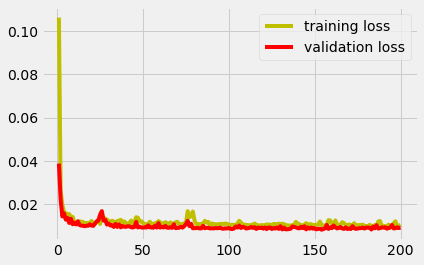

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r',label='validation loss')
plt.legend()

mse_neural, mae_neural = model.evaluate(x_test,y_test)

print('Mean squared error :',mse_neural)
print('Mean absolute error:',mae_neural)

y_pred_neu = model.predict(x_test)
r2_neu = r2_score(y_test,y_pred_neu)

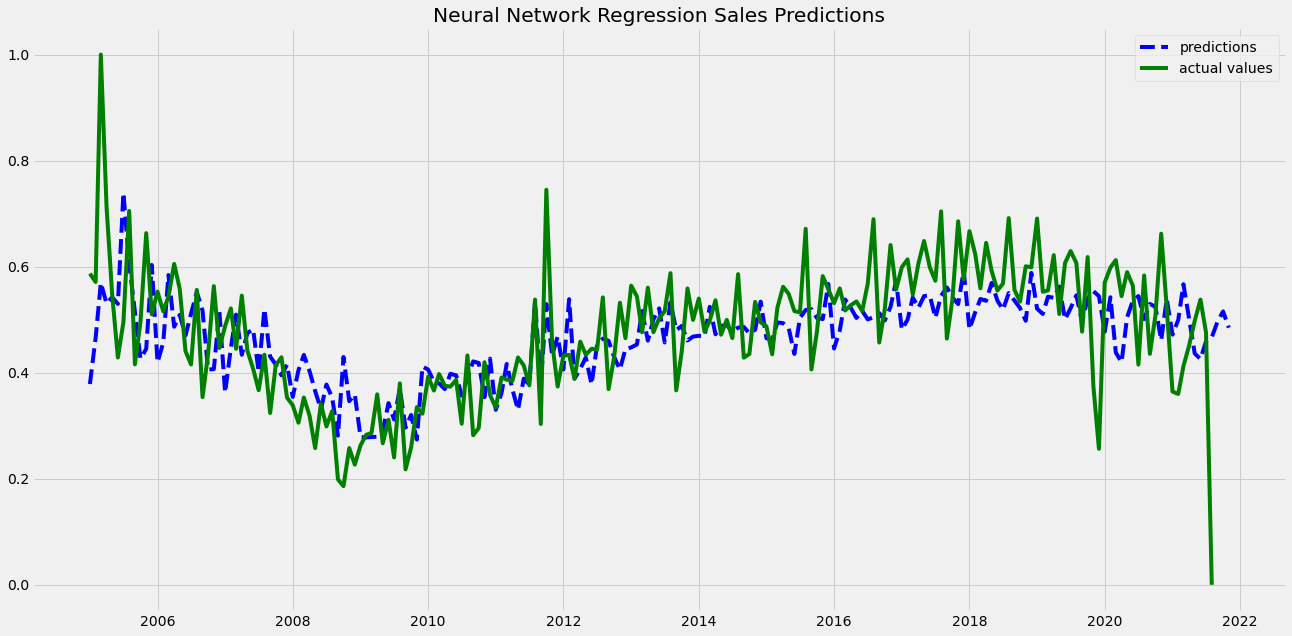

In [14]:

y_pred_neu2 = model.predict(x_test2)
neu_pred_data = pd.DataFrame(y_pred_neu2, index= y_test2.index).join(y_test2).sort_index()


plt.figure(figsize=(20,10))
plt.title('Neural Network Regression Sales Predictions')
plt.plot(neu_pred_data[0],'b--',label='predictions')
plt.plot(neu_pred_data['prediction'],'g',label='actual values')
plt.legend()

Mean squared error from linear reg: 0.010718161013267289
Mean absolute error 0.08324019542777303


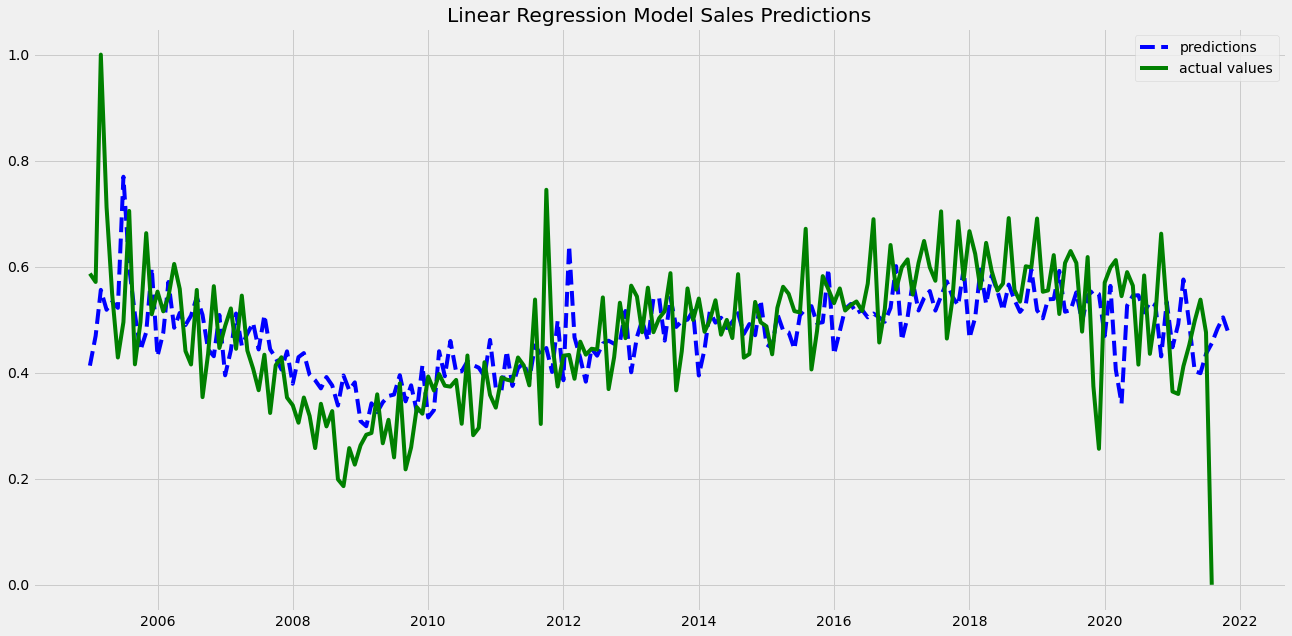

In [15]:
#Linear Model Regression
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print('Mean squared error from linear reg:',mse_lr)
print('Mean absolute error',mae_lr)

y_pred_lr2 = lr_model.predict(x_test2)
lr_pred_data = pd.DataFrame(y_pred_lr2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Linear Regression Model Sales Predictions')
plt.plot(lr_pred_data[0],'b--',label='predictions')
plt.plot(lr_pred_data['prediction'],'g',label='actual values')
plt.legend()

Mean squared error from dt: 0.012870890579901964
Mean absolute error dt: 0.09167750154314906


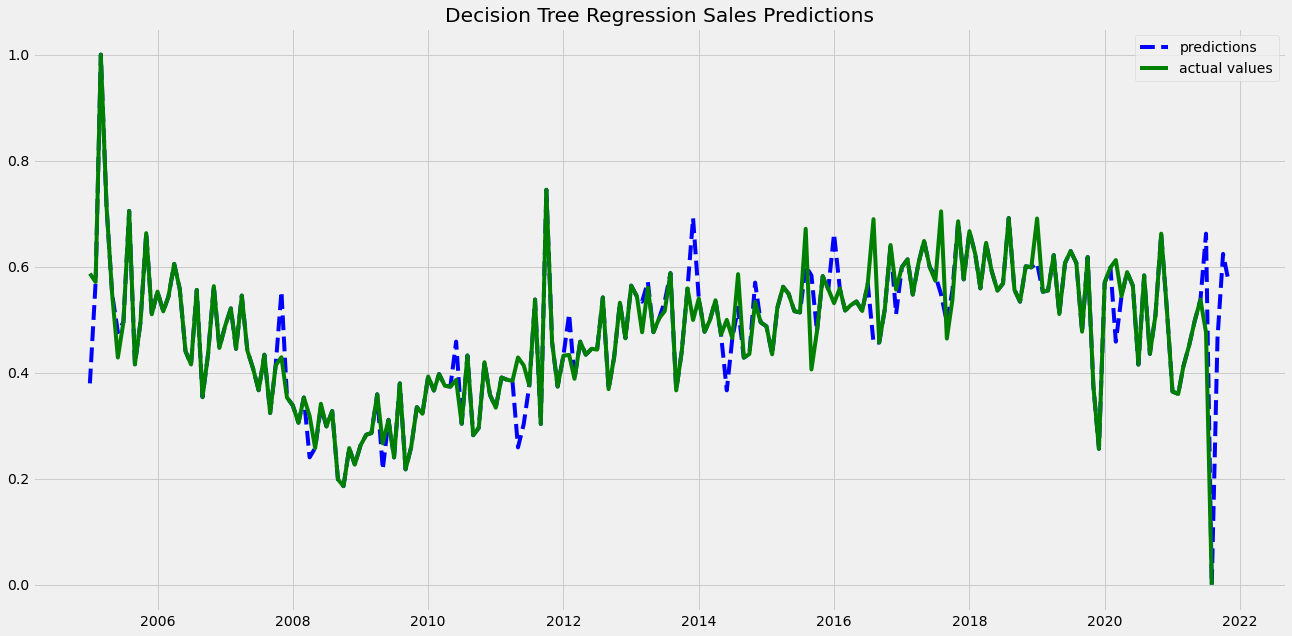

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt = mean_absolute_error(y_test,y_pred_tree)
r2_dt = r2_score(y_test,y_pred_tree)

print('Mean squared error from dt:',mse_dt)
print('Mean absolute error dt:',mae_dt)

y_pred_dt2 = tree.predict(x_test2)
dt_pred_data = pd.DataFrame(y_pred_dt2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Decision Tree Regression Sales Predictions')
plt.plot(dt_pred_data[0],'b--',label='predictions')
plt.plot(dt_pred_data['prediction'],'g',label='actual values')
plt.legend()


Mean squared error from dt: 0.010055831559935146
Mean absolute error dt: 0.08143861127930975
sales          0.537390
AvgRate        0.226064
AvgCompound    0.153506
PercPos        0.083040
dtype: float64


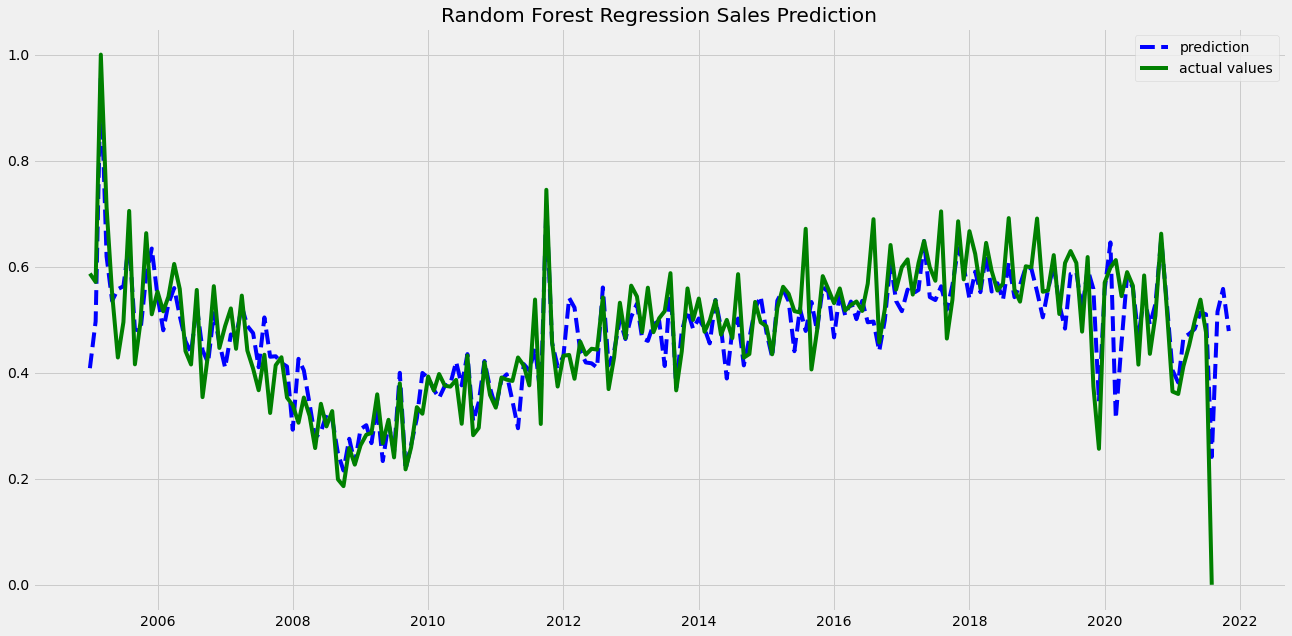

In [17]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=10, random_state=30)
rfmodel.fit(x_train,y_train)

y_pred_rf = model.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print('Mean squared error from dt:',mse_rf)
print('Mean absolute error dt:',mae_rf)

y_pred_rf2 = rfmodel.predict(x_test2)
rf_pred_data = pd.DataFrame(y_pred_rf2, index= y_test2.index).join(y_test2).sort_index()

print(pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False))


plt.figure(figsize=(20,10))
plt.title('Random Forest Regression Sales Prediction')
plt.plot(rf_pred_data[0],'b--',label='prediction')
plt.plot(rf_pred_data['prediction'],'g',label='actual values')
plt.legend()

In [18]:
print('Neural Networks mse,mae,r2:  ',mse_neural,mae_neural,r2_neu)
print('Linear Regression mse,mae,r2:',mse_lr,mae_lr,r2_lr)
print('Decison tree mse,mae,r2',mse_dt,mae_dt,r2_dt)
print('Random forests mse,mae,r2',mse_rf,mae_rf,r2_rf)

Neural Networks mse,mae,r2:   0.010055829770863056 0.08143861591815948 0.16291391020809887
Linear Regression mse,mae,r2: 0.010718161013267289 0.08324019542777303 0.10777905945614508
Decison tree mse,mae,r2 0.012870890579901964 0.09167750154314906 -0.07142242821527889
Random forests mse,mae,r2 0.010055831559935146 0.08143861127930975 0.16291391020809887
